# car and bike comparison - final

In [1]:
import json
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get the csv files
Weekmean_bike = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\bikemean.csv')
Weekmean_car = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\carmean.csv')



In [3]:
Weekmean_car


,Week in year,result
0,202044,7384.041885
1,202045,11288.244567
2,202046,11319.808315
3,202047,11197.631852
4,202048,11557.142541
5,202049,11444.617647
6,202050,11264.165587
7,202051,11005.713473
8,202052,8343.761536
9,202053,7501.512649


In [4]:
Weekmean_bike

,Week in year,result
0,202001,228.571429
1,202002,575.538462
2,202003,686.191489
3,202004,1112.494505
4,202005,748.919540
...,...,...
82,202130,1244.301129
83,202131,1301.646766
84,202132,1498.173544
85,202133,1091.966418


In [5]:
new_data=Weekmean_bike.merge(Weekmean_car, on='Week in year', how='left')

#Weekmean_bike.set_index('Week in year').join(Weekmean_car.set_index('Week in year')) 

In [6]:
new_data


,Week in year,result_x,result_y
0,202001,228.571429,NaN
1,202002,575.538462,NaN
2,202003,686.191489,NaN
3,202004,1112.494505,NaN
4,202005,748.919540,NaN
...,...,...,...
82,202130,1244.301129,12110.503025
83,202131,1301.646766,12713.942519
84,202132,1498.173544,13140.697004
85,202133,1091.966418,12869.182745


In [7]:
new_data.dtypes

Week in year      int64
result_x        float64
result_y        float64
dtype: object

In [8]:
new_data.columns

Index(['Week in year', 'result_x', 'result_y'], dtype='object')

In [9]:
new_data=new_data.rename(columns={"result_x": "bikes", "result_y": "cars"})

In [10]:
columns = ['Week in year','bikes', 'cars']

new_data

,Week in year,bikes,cars
0,202001,228.571429,NaN
1,202002,575.538462,NaN
2,202003,686.191489,NaN
3,202004,1112.494505,NaN
4,202005,748.919540,NaN
...,...,...,...
82,202130,1244.301129,12110.503025
83,202131,1301.646766,12713.942519
84,202132,1498.173544,13140.697004
85,202133,1091.966418,12869.182745


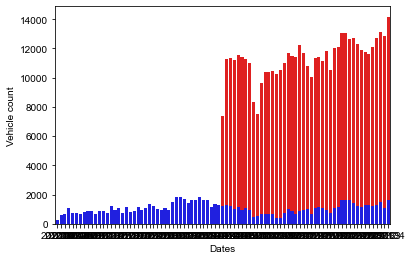

In [11]:
#  https://www.geeksforgeeks.org/how-to-overlap-two-barplots-in-seaborn/
  
# creating subplots
ax = plt.subplots()
  
# plotting columns
ax = sns.barplot(x=new_data["Week in year"], y=new_data["cars"], color='r')
ax = sns.barplot(x=new_data["Week in year"], y=new_data["bikes"], color='b')

  
# renaming the axes
ax.set(xlabel="Dates", ylabel="Vehicle count")
  
# visulaizing illustration

sns.set(rc={'figure.figsize':(30,10.27)})
plt.show()

In [12]:
#only keep the days with data for both, cars and bikes
#data for cars: 2020-11-01 (Week in year: 202044 ) to 2021-08-13 (Week in year: 202132 )

new_data_clean = new_data[new_data['Week in year']>=202044]
new_data_clean = new_data_clean[new_data_clean['Week in year']<=202132]


In [13]:
#add column "season": 
#autumn (22.9.-20.12.), 202044 - 202051
# winter (21.12. - 19.3.), 202052-202111
#spring (20.3. - 20.6.),202112-202124  
#summer (21.6.-21.9.), 202125-32 

new_data_clean["Season"] = "NA"
new_data_clean.loc[new_data_clean["Week in year"] > 202043, "Season"] = "autumn"
new_data_clean.loc[new_data_clean["Week in year"] > 202051, "Season"] = "winter"
new_data_clean.loc[new_data_clean["Week in year"] > 202111, "Season"] = "spring"
new_data_clean.loc[new_data_clean["Week in year"] > 202124, "Season"] = "summer"

In [14]:
new_data_clean.dtypes

Week in year      int64
bikes           float64
cars            float64
Season           object
dtype: object

In [15]:
new_data_clean

,Week in year,bikes,cars,Season
43,202044,1228.684303,7384.041885,autumn
44,202045,1275.924162,11288.244567,autumn
45,202046,1188.199295,11319.808315,autumn
46,202047,1022.449378,11197.631852,autumn
47,202048,1121.646520,11557.142541,autumn
48,202049,973.694574,11444.617647,autumn
49,202050,1064.354278,11264.165587,autumn
50,202051,944.571240,11005.713473,autumn
51,202052,439.267532,8343.761536,winter
52,202053,509.898701,7501.512649,winter


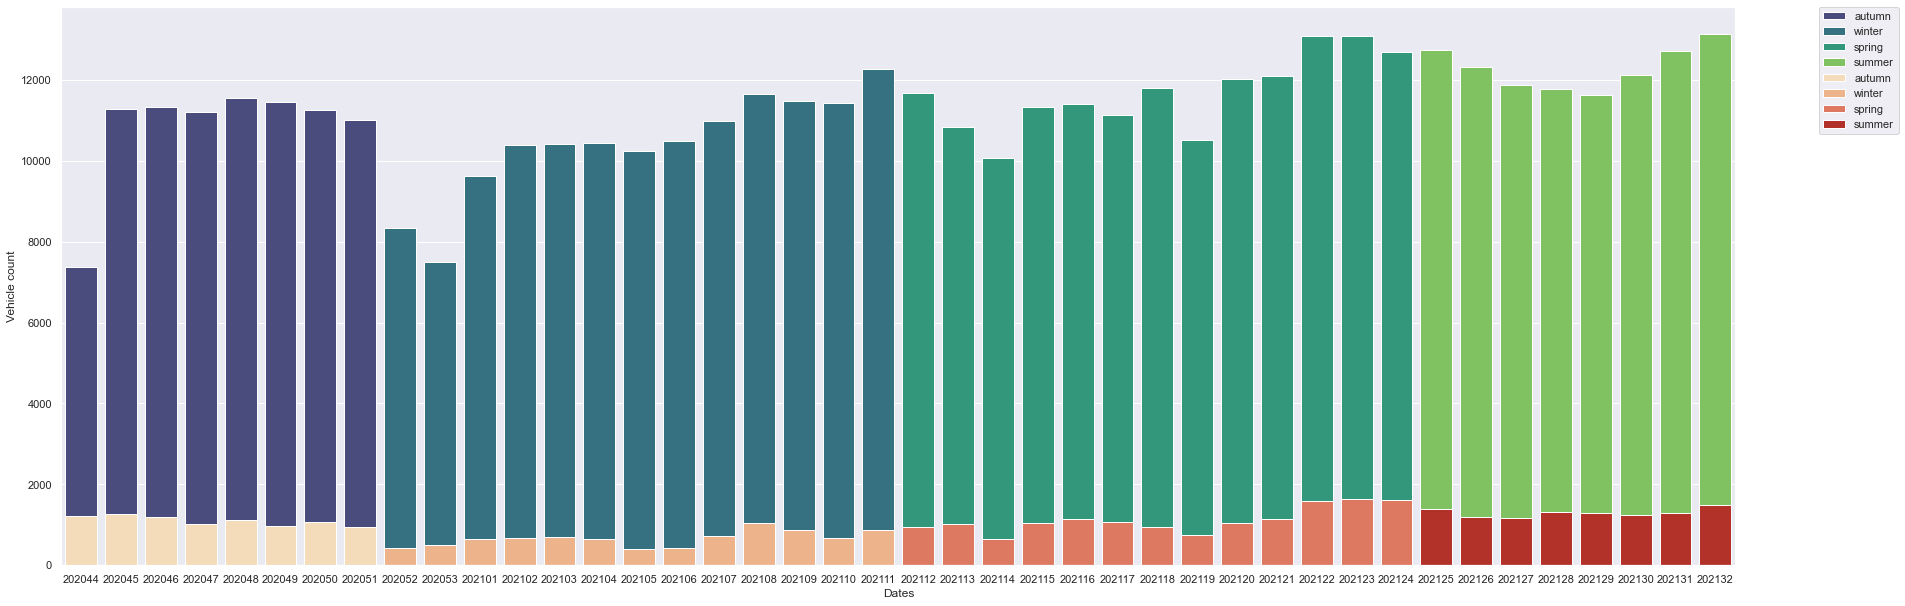

In [16]:
# creating subplots
ax = plt.subplots()
  
# plotting columns
ax = sns.barplot(x=new_data_clean["Week in year"], y=new_data["cars"], palette="viridis", hue=new_data_clean["Season"], dodge=False)
                 #hue="Season")
                 #color='r')
ax = sns.barplot(x=new_data_clean["Week in year"], y=new_data["bikes"],palette="OrRd", hue=new_data_clean["Season"], dodge=False)
                 #color='b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  
# renaming the axes
ax.set(xlabel="Dates", ylabel="Vehicle count")
  
# visulaizing illustration

sns.set(rc={'figure.figsize':(30,20)})
plt.show()

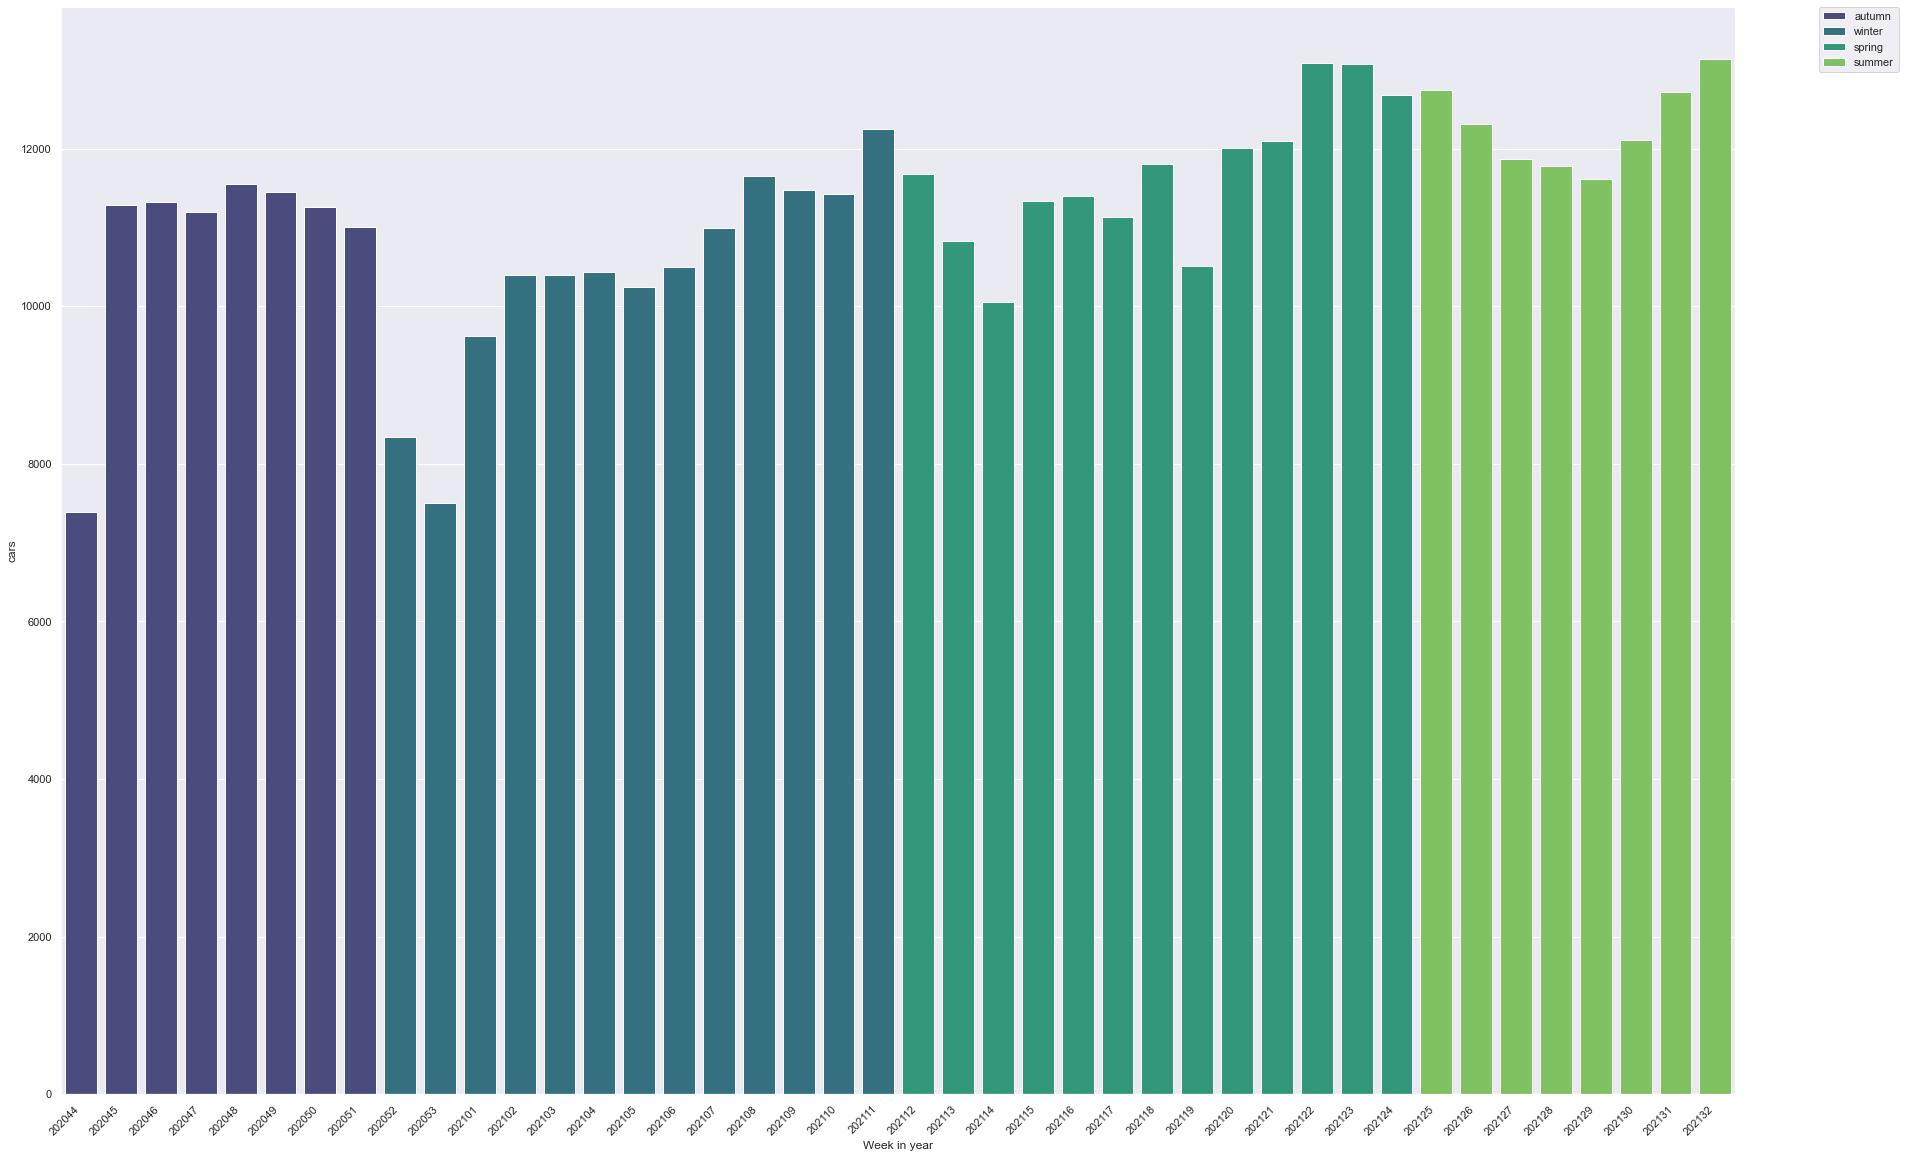

In [22]:
import matplotlib.style as style
style.available

#style.use('seaborn-talk') #sets the size of the charts
#style.use('ggplot')


#try to adapt the labels on the x-axis (to show the months, not the weeks/year)

#colours: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
sns.barplot(x=new_data_clean["Week in year"], y=new_data["cars"], palette="viridis", hue=new_data_clean["Season"], dodge=False)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


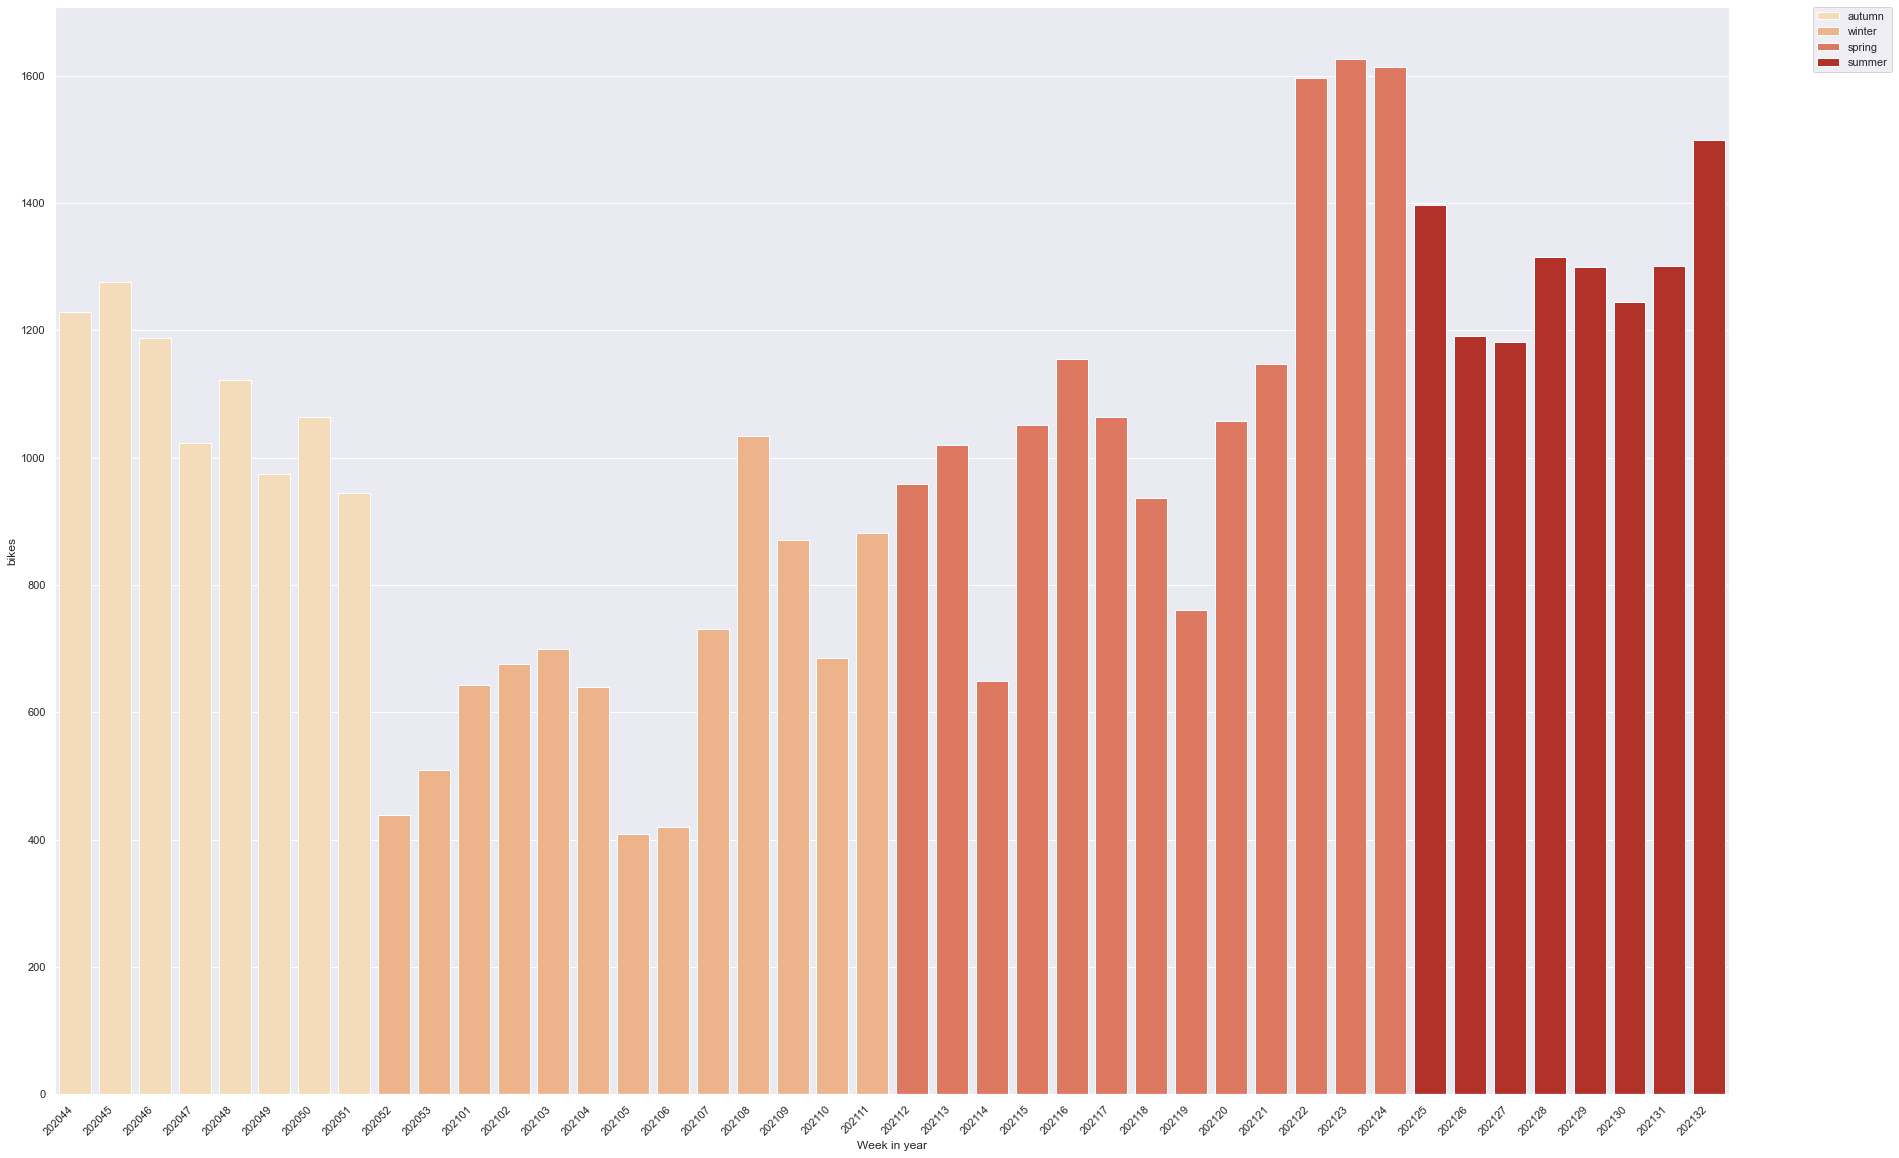

In [21]:

sns.barplot(x=new_data_clean["Week in year"], y=new_data["bikes"], palette="OrRd",hue=new_data_clean["Season"], dodge=False)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

